# A1: Logic and lambda calculus

The lab is an exploration and learning exercise to be done in a group and also in discussion with the teachers and other students.

Before starting, please read the following instructions on [how to work on group assignments](https://github.com/sdobnik/computational-semantics/blob/master/README.md).

Write all your answers and the code in the appropriate boxes below.

## Translating English to logic and evaluating logic in a model

In [1]:
# This task needs NLTK and Jupyter Notebook (IPython package).
import nltk
from utils import display_latex, display_translation, display_tree, display, Markdown
read_expr = nltk.sem.Expression.fromstring

### 1. Propositional logic
Translate the following sentences into **propositional logic** and verify that they parse with Expression.fromstring(). Provide a key which shows how the propositional variables in your translation correspond to expressions of English. Briefly discuss any difficulties you encounter. (By difficulties we mean cases where the semantics of English expressions cannot be expressed to the same degree by the semantics of your logic representations, i.e. they do not mean the same). **[5 + 1 marks]**

In [2]:
'''
  Key:
    Ap = Alex plays the piano
    As = Alex is smart
    Am = Alex is musical
    Lh = Lydia is happy
    Gp = George plays the piano
    Gm = Georg is musical
'''

propositions = {
    "If Alex plays the piano, she is smart.": # P->Q
    read_expr('Ap -> As'),
    
    "Alex is both smart and musical.": # P&&Q
    read_expr('As & Am'),
    
    "If Alex is not smart, Lydia is not happy.": # !P->!Q
    read_expr('-As -> -Lh'),
    
    "If Alex or George plays the piano, they are musical.": # (P||Q)->R
    read_expr('Ap | Gp -> Am & Gm'),
    
    "George plays the piano.": # P
    read_expr('Gp'),
}

for text, semrep in propositions.items():
    display_translation(text, semrep)

"If Alex plays the piano, she is smart.": $(Ap\ \rightarrow\ As)$

"Alex is both smart and musical.": $(As\ \land\ Am)$

"If Alex is not smart, Lydia is not happy.": $(-As\ \rightarrow\ -Lh)$

"If Alex or George plays the piano, they are musical.": $((Ap\ \lor\ Gp)\ \rightarrow\ (Am\ \land\ Gm))$

"George plays the piano.": $Gp$

*Difficulties encountered:*

`Answers here`

Each variable stands on its own and cannot accept or alter properties.
Therefor we need to have separate variables for 'someone has ... property'. I,e., 'George is musical' and 'Alex is musical' are independent variables. Also for statement 1, we need to have 'Alex plays piano' and 'Alex is smart' even if they may not relate to each other.

### 2. Valuation of Propositional logic

Imagine that we observe a world where 
- (i) Alex does not play the piano,
- (ii) Alex and Lydia are smart and musical,
- (iii) George is not musical,
- (iv) Lydia is happy,
- (v) George plays the piano. 

Translate this informal description of the world into a model by appropriately defining an evaluation function and evaluate the formulae from Question 1 in this model. Briefly comment the answers you get. **[5 + 1 marks]**.

In [3]:
# Set vars according to statements
val = nltk.Valuation([
    ('Ap', False), 
    ('As', True),('Am', True),('Ls', True), ('Lm', True),
    ('Gm', False),
    ('Lh', True),
    ('Gp', True),
    ])

# Init the model
dom = set()
g = nltk.Assignment(dom)
model_Q2 = nltk.Model(dom, val)

# Evaluate Q1 formulas
def eval_formula(expr, model, goal):
    return model.evaluate( expr, goal)


for text, semrep in propositions.items():
    print(text , semrep)
    print( eval_formula(expr=str(semrep), model=model_Q2, goal=g), '\n' )

If Alex plays the piano, she is smart. (Ap -> As)
True 

Alex is both smart and musical. (As & Am)
True 

If Alex is not smart, Lydia is not happy. (-As -> -Lh)
True 

If Alex or George plays the piano, they are musical. ((Ap | Gp) -> (Am & Gm))
False 

George plays the piano. Gp
True 



*Comments:*

### 3. Predicate logic *without quantifiers*

Translate the following sentences into predicate-argument formulae of First Order Logic and verify that they parse with `Expression.fromstring()`. Briefly discuss any difficulties you encounter. **[4 + 1 marks]**

In [4]:
sentences1 = {
    "Lydia likes George but Lydia doesn't like Alex": # P&&!Q
    read_expr(r' like(george, lydia) & -like(lydia, alex) '),
    
    "Lydia likes herself and so does George": # P&&Q  (george likes lydia or himself??)
    read_expr(r' like(lydia,lydia) & like(george,george)'),
    
    "Charlie is an English pianist who plays a sonata": #
    read_expr(r'english(charlie) & pianist(charlie) & play(charlie, sonata)'),
    
    "Lydia and George admire each other": #
    read_expr(r' admire(lydia, george) & admire(george, lydia) '),
}

for text, semrep in sentences1.items():
    display_translation(text, semrep)


"Lydia likes George but Lydia doesn't like Alex": $(like(george,lydia)\ \land\ -like(lydia,alex))$

"Lydia likes herself and so does George": $(like(lydia,lydia)\ \land\ like(george,george))$

"Charlie is an English pianist who plays a sonata": $(english(charlie)\ \land\ pianist(charlie)\ \land\ play(charlie,sonata))$

"Lydia and George admire each other": $(admire(lydia,george)\ \land\ admire(george,lydia))$

*Difficulties encountered:*

`Answers here`
*Difficulties encountered:*

`Answers here`

We were confused by statement 2 ---does George like himself too or does George like Lydia too? (Some of us chose the former, and some the latter)
When translating this to logic though, it has to be explicit and unambiguous.

### 4. First order logic with quantifiers

Translate the following sentences into quantified formulas of First Order Logic and verify that they parse with `Expression.fromstring()`. Briefly discuss any difficulties you encounter. **[4 + 1 marks]**

In [67]:
sentences2 = {
    "Charlie knows a woman who likes George":
    read_expr('exists x.(know(charlie, x) & woman(x) & like(x, george))'),
    
    "George admires everybody and Lydia admires nobody":
#     read_expr('all x.admire(george, x) & -(exist x.(admire(lydia, x))) '),
    # for all x that is human: george admire them, and lydia doesn't
    read_expr('all x.(woman(x)|man(x) -> admire(george,x) & -admire(lydia,x) )'),
    
    #------VARIANTS OF 'Nobody admires everybody'
    "Nobody admires everybody":
    # There is no person that admires everyone (=> cf sv, Alla ...ej allihopa...?)
    read_expr('-exists x. all y. admire(x, y)'),
    
    "There exists person that admires nobody":
    read_expr('exists x. all y. - admire(x, y)'),
    
    "Nobody admires everybody 2":  # ∀x∃y¬ admire(x,y)
    # Everyone has one person they don't admire
    read_expr('all x. (exists y. (-admire(x,y)))'),
    #-------------------------------------------------
       
    "Exactly one musician plays everything Alex wrote":
    #read_expr('exists x.(musician(x) & all y.(musican(y) -> (y = x)))'),
    #read_expr('exists x. musician(x) & all y. wrote (alex, y) -> play(x,y) & all z. (musician(z) -> (z = x))'),

    read_expr(' exists z all y(( musician(y) & all x(wrote(alex,x)->play(y,x))) <-> y=z )'), 
            # 1) Some musicians y plays all x written by Alex                        
            # 2) Such musican y is unique => so all such y must be z ; using uniqueness expr: ∃a∀b(P(a)<->b=a) 
            # NOTE it was UNDEFINED until I put the rest in parentheses i.e., ∃z∀y ([bla bla...] <-> y=z)
            #      then it magically worked 🐨
                                     
}

for text, semrep in sentences2.items():
    display_translation(text, semrep)

"Charlie knows a woman who likes George": $\exists\ x.(know(charlie,x)\ \land\ woman(x)\ \land\ like(x,george))$

"George admires everybody and Lydia admires nobody": $(\forall\ x.admire(george,x)\ \land\ -\exists\ x.admire(lydia,x))$

"Nobody admires everybody": $-\exists\ x.\forall\ y.admire(x,y)$

"There exists person that admires nobody": $\exists\ x.\forall\ y.-admire(x,y)$

"Nobody admires everybody 2": $\forall\ x.\exists\ y.-admire(x,y)$

"Exactly one musician plays everything Alex wrote": $(\forall\ x.wrote(alex,x)\ \rightarrow\ \exists\ z.\forall\ y.((musician(y)\ \land\ play(y,x))\ \leftrightarrow\ (y\ =\ z)))$

### 5. Valuation of first order logic

We observe a world with entities Lydia, George, Alex, Charlie and Bertie, sonata, etude, prelude, waltz, scherzo.

1. Lydia likes Lydia, George, Alex and Charlie. George likes Lydia, Bertie and George. Alex likes Alex. Charlie likes Lydia, George, Alex, Charlie and Bertie. Bertie likes Alex.
2. Lydia, George, Alex, Charlie and Bertie are English.
3. Charlie and Bertie are pianists.
4. Charlie plays a sonata, an etude and a waltz. Bertie plays a waltz and a scherzo. Lydia plays an etude, a prelude and a waltz.
5. Lydia admires Lydia, Charlie and Bertie. George admires Lydia, George, Alex, Charlie and Bertie. Alex admires Lydia, Alex and Bertie. Charlie admires George and Bertie. Bertie admires Lydia, George, Alex, Charlie and Bertie.
6. Lydia knows Lydia, George, Alex, Charlie and Bertie. George knows Lydia, George and Bertie. Alex knows Lydia, Alex and Bertie. Charlie knows George, Charlie and Bertie. Bertie knows Lydia, George, Alex, Charlie and Bertie.
7. Lydia, Alex and Charlie are women.
8. George and Bertie are men.
9. Alex wrote a sonata, an etude an a waltz.
10. Lydia, Alex, Charlie and Bertie are musicians.

Translate this informal description of the world into a model and evaluate the formulae from Questions 3 and 4 in this model. Briefly comment on the answers you get **[3 + 2 marks]**.

In [56]:
entities = set(['p','t','e','h','r','s','u','l','w','c'])


assign = """
lydia => p
george => t
alex => e
charlie => h
bertie => r
sonata => s
etude => u
prelude => l
waltz => w
scherzo => c

like => { \
        (p, p), (p, t), (p, e), (p, h), #Lydia \
        (t, p), (t, r), (t, t), #George \
        (e, e), #Alex \
        (h, p), (h, t), (h, h), (h, e), #Charlie \
        (r, e) #Bertie   }

english => {p, t, e, h, r}
pianist => {h, r}
play => { (h, s), (h, u), (h, w), \
            (r, w), (r, c), \
            (p, u), (p, l), (p, w)}
admire => { \
            (p, p), (p, h), (p, r), \
            (t, p), (t, t), (t, e), (t, h), (t, r), \
            (e, p), (e, e), (e, r), \
            (h, t), (h, r), \
            (r, p), (r, t), (r, e), (r, h), (r, r)  }
know => { \
            (p, p), (p, t), (p, e), (p, e), (p, h), (p, r), \
            (t, p), (t, t), (t, r), \
            (e, p), (e, e), (e, r), \
            (h, t), (h, h), (h, r), \
            (r, p), (r, t), (r, e), (r, h), (r, r)}

woman => {p, e, h}
man => {t, r}
wrote => {(e, s), (e, u), (e, w), (e, c)}
musician => {p, e, h, r}
"""


val2 = nltk.Valuation.fromstring(assign)

g2 = nltk.Assignment(entities)
m2 = nltk.Model(entities, val2)

# sentences from question 3
for text, semrep in sentences1.items():
    print(m2.evaluate(str(semrep), g2))
    display_latex(semrep)
    display(Markdown('----'))

# sentences from question 4
for text, semrep in sentences2.items():
    print(m2.evaluate(str(semrep), g2))
    display_latex(semrep)
    display(Markdown('----'))


False


$(like(george,lydia)\ \land\ -like(lydia,alex))$

----

True


$(like(lydia,lydia)\ \land\ like(george,george))$

----

True


$(english(charlie)\ \land\ pianist(charlie)\ \land\ play(charlie,sonata))$

----

False


$(admire(lydia,george)\ \land\ admire(george,lydia))$

----

True


$\exists\ x.(know(charlie,x)\ \land\ woman(x)\ \land\ like(x,george))$

----

False


$(\forall\ x.admire(george,x)\ \land\ -\exists\ x.admire(lydia,x))$

----

True


$\forall\ x.\exists\ y.-admire(x,y)$

----

True


$(\forall\ x.wrote(alex,x)\ \rightarrow\ \exists\ z.\forall\ y.((musician(y)\ \land\ play(y,x))\ \leftrightarrow\ (y\ =\ z)))$

----

*Comments on the answers:*

`Answers here`

## Lambda calculus

In [7]:
from nltk.grammar import FeatureGrammar

### 6. Function application and $\beta$-reduction
In the following examples some code has been deleted and replaced with `<????>`. What has been deleted? Verify that your answer is correct. **[4 marks]**

In [8]:
e1 = read_expr(r'\x.like(x,rob)')
e2 = read_expr(r'pip')
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with reuslt like(pip,rob).
display_latex(read_expr(r"like(pip,rob)"))

e1 = read_expr(r'\P.P(pip)')
e2 = read_expr(r'\x.play(x,scherzo)') 
e3 = nltk.sem.ApplicationExpression(e1,e2)
display_latex(e3.simplify())
# with result play(pip,scherzo).
display_latex(read_expr(r"play(pip,scherzo)"))

e1 = read_expr(r'\P. exists x. (woman(x) & P(x))') # (P())=> exists x. ( woman(x) & P(x) )
e2 = read_expr(r'\x.play(x,etude)')
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with result exists x.(woman(x) & play(x,etude)).
display_latex(read_expr(r"exists x.(woman(x) & play(x,etude))"))

e1 = read_expr(r'\P x.P(\y.like(x,y))') # (Q())=> x Q(\y like(x,y))
e2 = read_expr(r'\P.all x. (musician(x) -> P(x))') 
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with result \x.all z2.(musician(z2) -> like(x,z2)).
display_latex(read_expr(r"\x.all z2.(musician(z2) -> like(x,z2))"))

$like(pip,rob)$

$like(pip,rob)$

$play(pip,scherzo)$

$play(pip,scherzo)$

$\exists\ y.(woman(y)\ \land\ play(y,etude))$

$\exists\ x.(woman(x)\ \land\ play(x,etude))$

$\lambda\ x.\forall\ z_{1}.(musician(z_{1})\ \rightarrow\ like(x,z_{1}))$

$\lambda\ x.\forall\ z_{2}.(musician(z_{2})\ \rightarrow\ like(x,z_{2}))$

### 7. Extending the grammar

Extend the grammar simple_sem.fcfg that comes with NLTK `(~/nltk_data/grammars/book_grammars/)` so that it will cover the following sentences:

- no man gives a bone to a dog **[4 marks]**
- no man gives a bone to the dog **[4 marks]**
- a boy and a girl chased every dog **[2 marks]**
- every dog chased a boy and a girl **[2 marks]**
- a brown cat chases a white dog **[4 marks]**

The last example includes adjectives. Several different kinds of adjectives are discussed in the literature [(cf. Kennedy, 2012)](http://semantics.uchicago.edu/kennedy/docs/routledge.pdf). In this example we have an intersective adjective. The denotiation we want for "brown cat" is a a set that we get by intersecting the set of individuals that are brown and the set of individuals that are cats.

C. Kennedy. Adjectives. In G. Russell, editor, The Routledge Companion to Philosophy of Language, chapter 3.3, pages 328–341. Routledge, 2012.

The original grammar is included in the code below as a string.

In [31]:
fcfg_string_orginal = r"""
% start S
############################
# Grammar Rules
#############################

S[SEM = <?subj(?vp)>] -> NP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp]

NP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  Nom[NUM=?n,SEM=?nom]
NP[LOC=?l,NUM=?n,SEM=?np] -> PropN[LOC=?l,NUM=?n,SEM=?np]

Nom[NUM=?n,SEM=?nom] -> N[NUM=?n,SEM=?nom]

VP[NUM=?n,SEM=?v] -> IV[NUM=?n,SEM=?v]
VP[NUM=?n,SEM=<?v(?obj)>] -> TV[NUM=?n,SEM=?v] NP[SEM=?obj]
VP[NUM=?n,SEM=<?v(?obj,?pp)>] -> DTV[NUM=?n,SEM=?v] NP[SEM=?obj] PP[+TO,SEM=?pp]

PP[+TO, SEM=?np] -> P[+TO] NP[SEM=?np]

#############################
# Lexical Rules
#############################

PropN[-LOC,NUM=sg,SEM=<\P.P(angus)>] -> 'Angus'
PropN[-LOC,NUM=sg,SEM=<\P.P(cyril)>] -> 'Cyril'
PropN[-LOC,NUM=sg,SEM=<\P.P(irene)>] -> 'Irene'
 
Det[NUM=sg,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'every'
Det[NUM=pl,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'all'
Det[SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'some'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'a'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'an'

N[NUM=sg,SEM=<\x.man(x)>] -> 'man'
N[NUM=sg,SEM=<\x.girl(x)>] -> 'girl'
N[NUM=sg,SEM=<\x.boy(x)>] -> 'boy'
N[NUM=sg,SEM=<\x.bone(x)>] -> 'bone'
N[NUM=sg,SEM=<\x.ankle(x)>] -> 'ankle'
N[NUM=sg,SEM=<\x.dog(x)>] -> 'dog'
N[NUM=pl,SEM=<\x.dog(x)>] -> 'dogs'

IV[NUM=sg,SEM=<\x.bark(x)>,TNS=pres] -> 'barks'
IV[NUM=pl,SEM=<\x.bark(x)>,TNS=pres] -> 'bark'
IV[NUM=sg,SEM=<\x.walk(x)>,TNS=pres] -> 'walks'
IV[NUM=pl,SEM=<\x.walk(x)>,TNS=pres] -> 'walk'
TV[NUM=sg,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chases'
TV[NUM=pl,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chase'
TV[NUM=sg,SEM=<\X x.X(\ y.see(x,y))>,TNS=pres] -> 'sees'
TV[NUM=pl,SEM=<\X x.X(\ y.see(x,y))>,TNS=pres] -> 'see'
TV[NUM=sg,SEM=<\X x.X(\ y.bite(x,y))>,TNS=pres] -> 'bites'
TV[NUM=pl,SEM=<\X x.X(\ y.bite(x,y))>,TNS=pres] -> 'bite'
DTV[NUM=sg,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'gives'
DTV[NUM=pl,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'give'

P[+to] -> 'to'
"""

Write your extension of this grammar here:

In [63]:
fcfg_string = fcfg_string_orginal + r"""
## Your answers here
Det[SEM=<\P Q.-exists x.(P(x) & Q(x))>] -> 'no'

# 
Det[SEM=<\P Q.exists x.(P(x) & all y.(P(y) -> x=y) & Q(x))>] -> 'the'
# Det[SEM=<\Q P.exists x.(Q(x) & P(x) & all y.(Q(y) -> (y=x)))>] -> 'the' | 'The'
TV[SEM=<\X x.X(\y.chase(x,y))>,TNS=past] -> 'chased'
CONJ -> 'and'
NP[NUM=pl,SEM=<\ Q.(?nom1(Q) & ?nom2(Q))> ] -> NP[NUM=?n1,SEM=?nom1] CONJ NP[NUM=?n2,SEM=?nom2]
N[NUM=sg,SEM=<\x.cat(x)>] -> 'cat'
ADJ[SEM=<\P x.(brown(x) & P(x))>] -> 'brown'
ADJ[SEM=<\P x.(white(x) & P(x))>] -> 'white'
NP[NUM=?n,SEM=<?det(?adj(?nom))>] -> Det[SEM=?det] ADJ[SEM=?adj] Nom[SEM=?nom]
"""

# Load `fcfg_string` as a feature grammar:
syntax = FeatureGrammar.fromstring(fcfg_string)

Run the code below without errors:

----

$-\exists\ x.(man(x)\ \land\ \exists\ z_{106}.(dog(z_{106})\ \land\ \exists\ z_{105}.(bone(z_{105})\ \land\ give(x,z_{105},z_{106}))))$

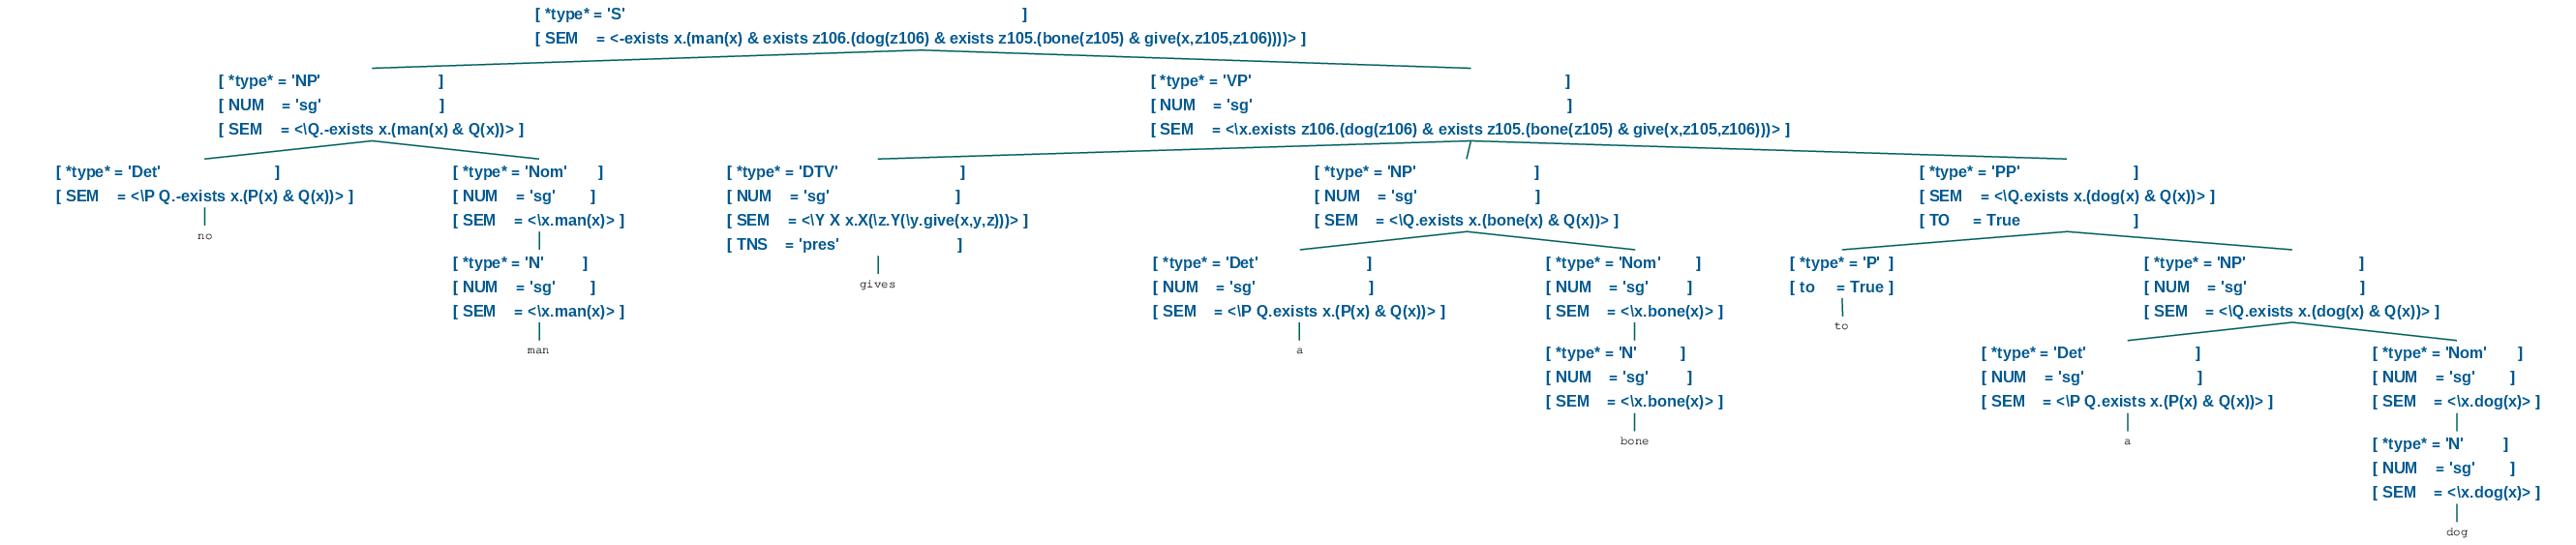

----

$-\exists\ x.(man(x)\ \land\ \exists\ z_{108}.(dog(z_{108})\ \land\ \forall\ y.(dog(y)\ \rightarrow\ (z_{108}\ =\ y))\ \land\ \exists\ z_{107}.(bone(z_{107})\ \land\ give(x,z_{107},z_{108}))))$

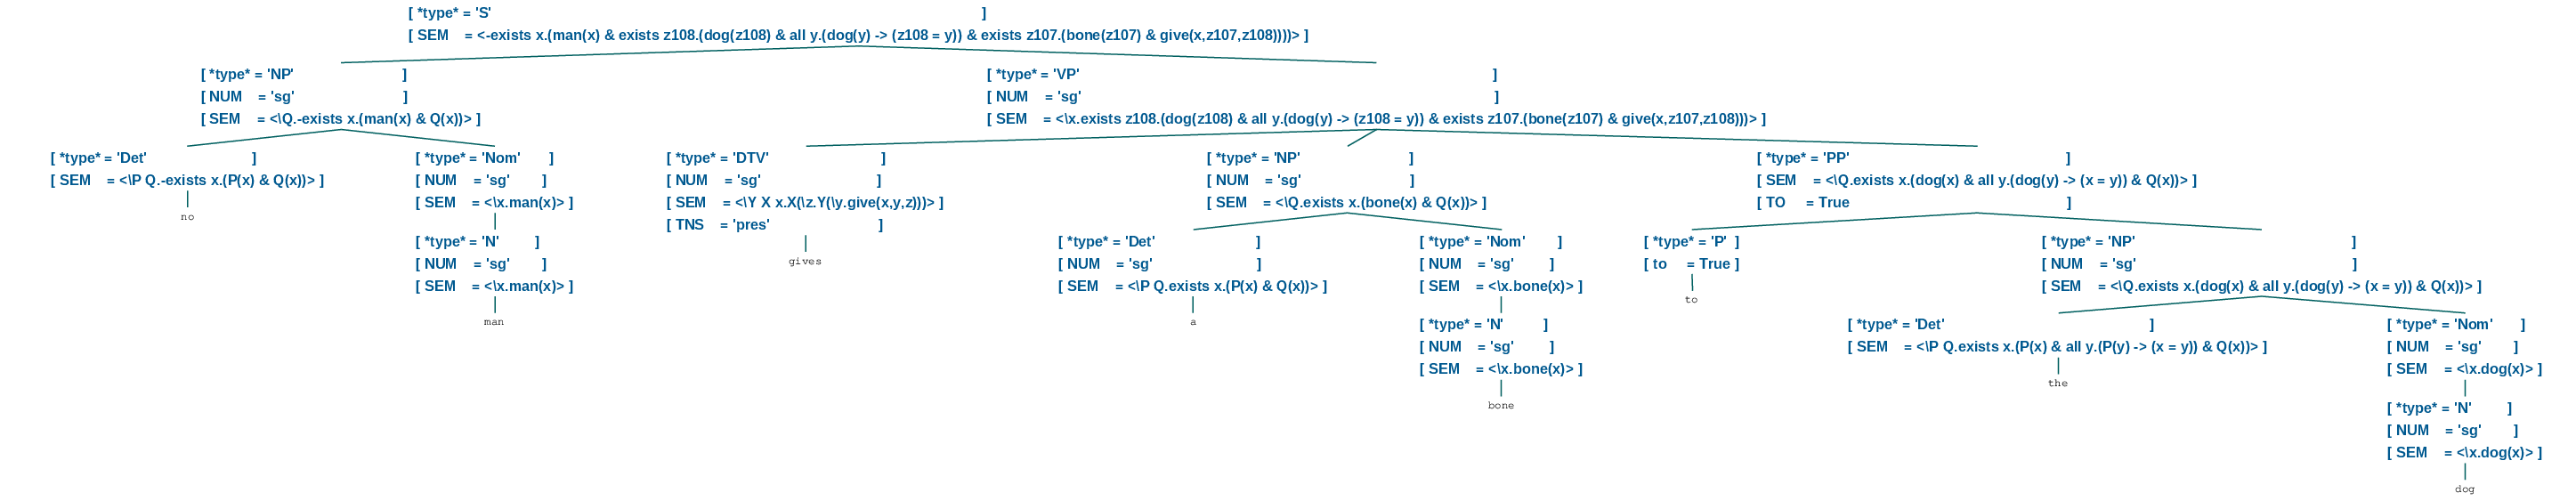

----

$(\exists\ x.(boy(x)\ \land\ \forall\ z_{109}.(dog(z_{109})\ \rightarrow\ chase(x,z_{109})))\ \land\ \exists\ x.(girl(x)\ \land\ \forall\ z_{109}.(dog(z_{109})\ \rightarrow\ chase(x,z_{109}))))$

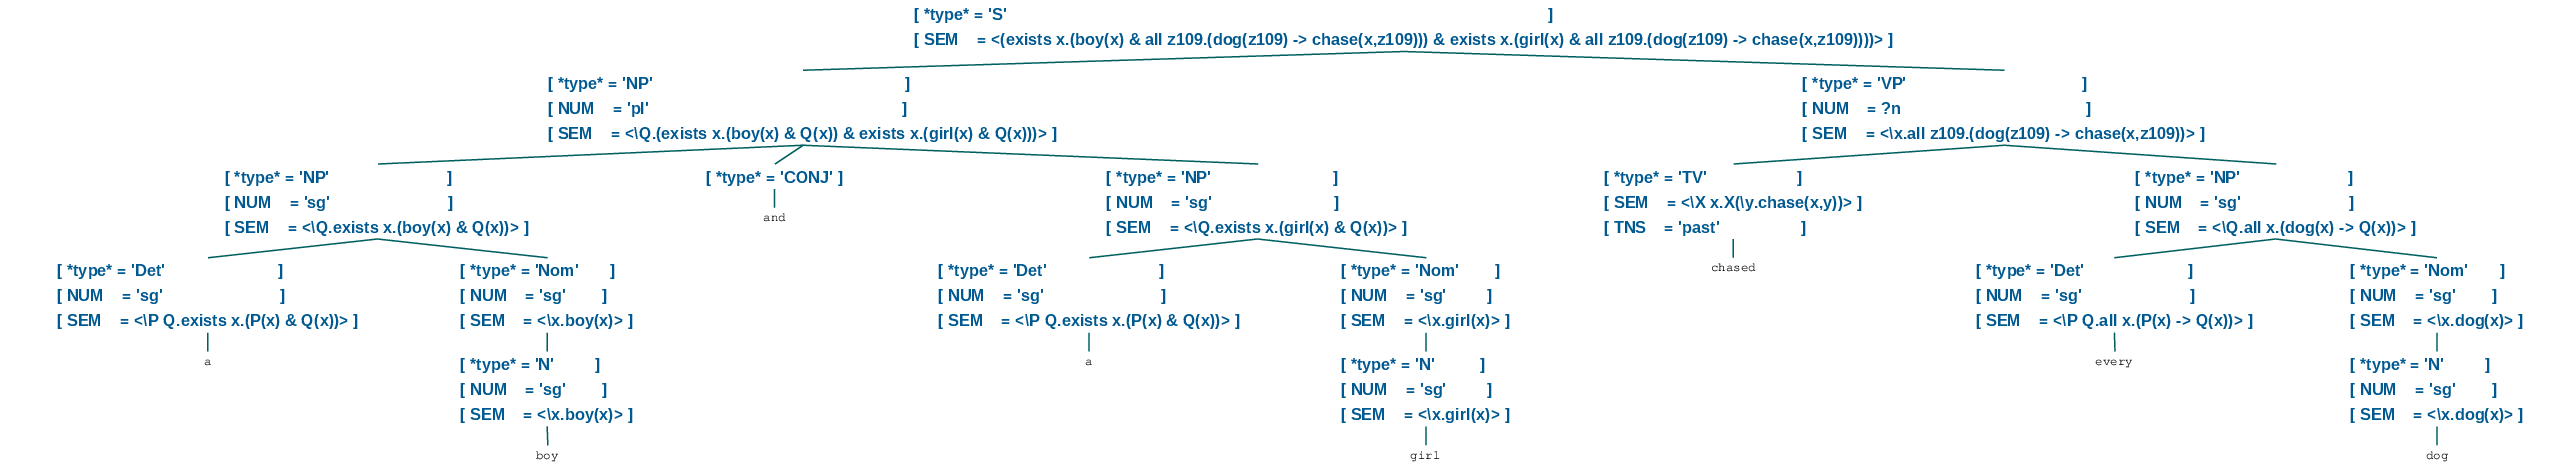

----

$\forall\ x.(dog(x)\ \rightarrow\ (\exists\ z_{111}.(boy(z_{111})\ \land\ chase(x,z_{111}))\ \land\ \exists\ z_{112}.(girl(z_{112})\ \land\ chase(x,z_{112}))))$

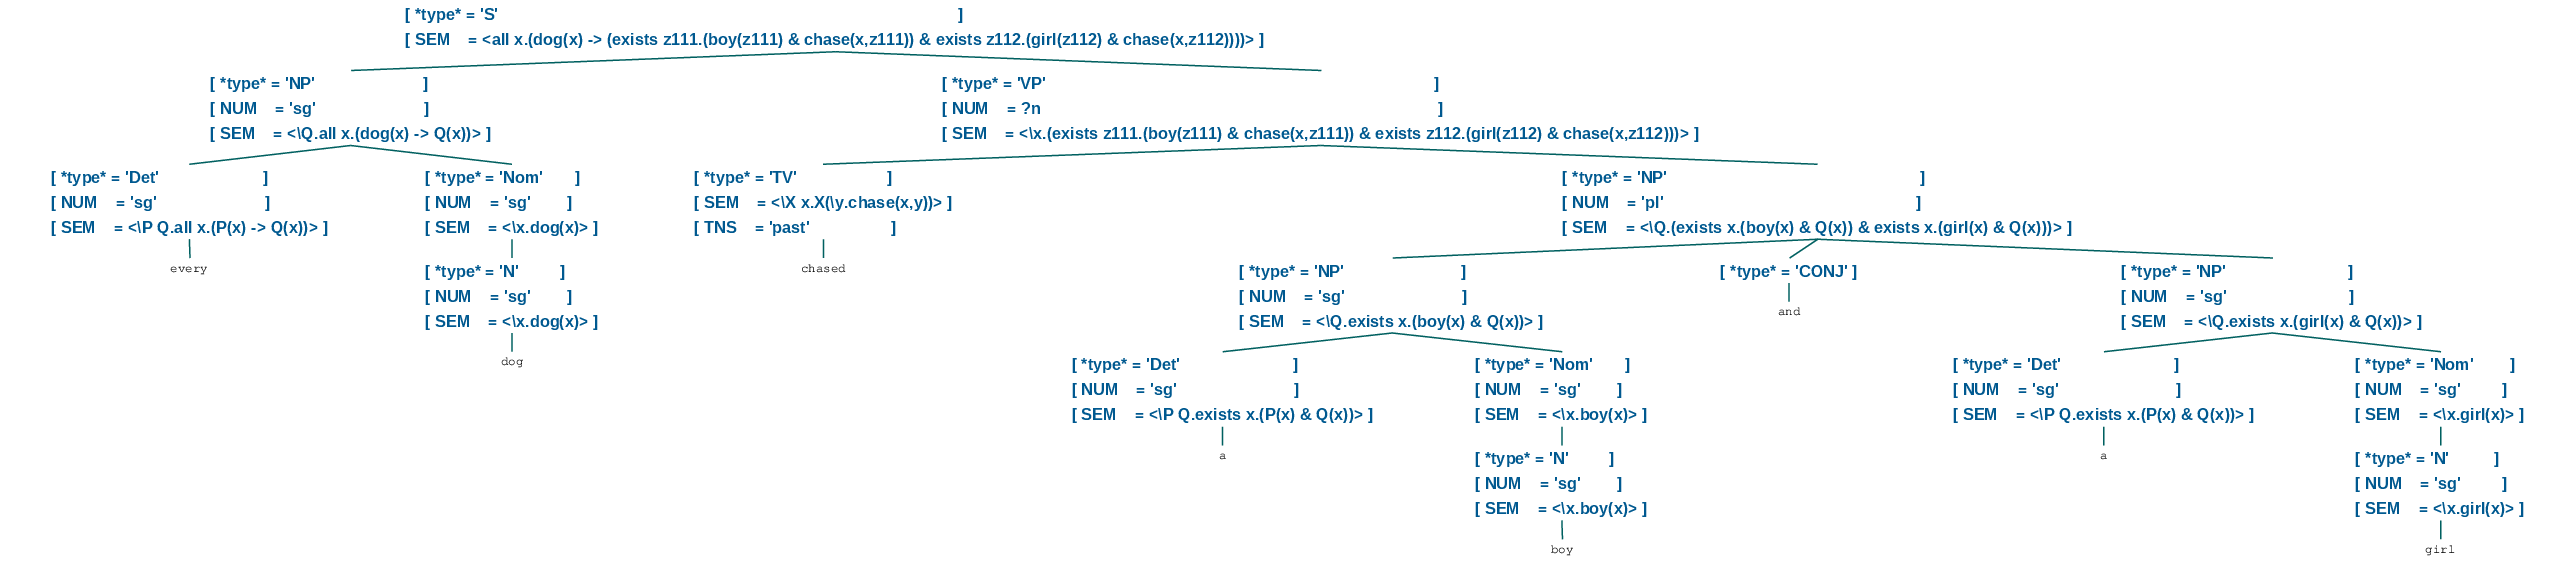

----

$\exists\ x.(brown(x)\ \land\ cat(x)\ \land\ \exists\ z_{113}.(white(z_{113})\ \land\ dog(z_{113})\ \land\ chase(x,z_{113})))$

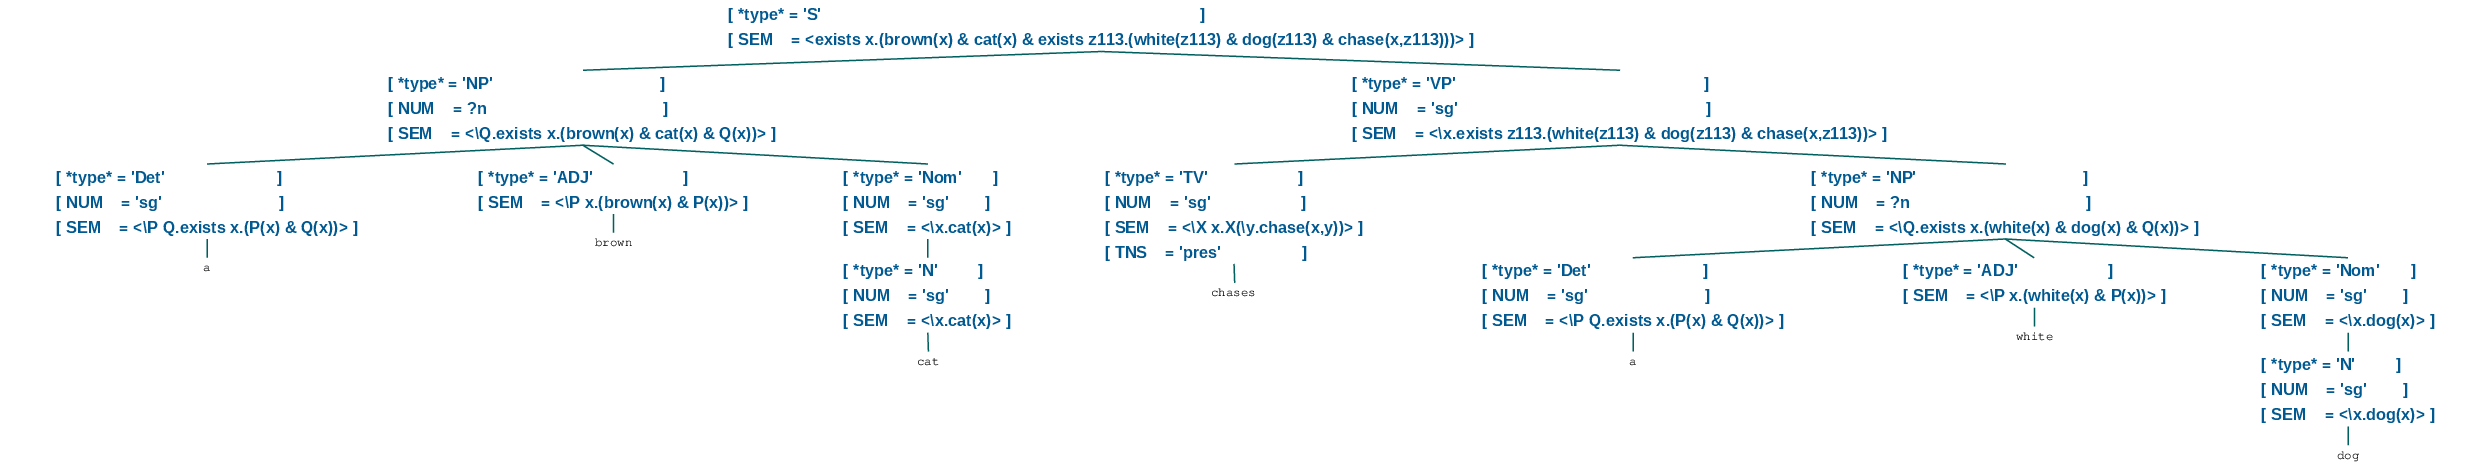

In [64]:
# remove sentences if you couldn't find answer for them
sentences = [
    'no man gives a bone to a dog',
    'no man gives a bone to the dog',
    'a boy and a girl chased every dog',
    'every dog chased a boy and a girl',
    'a brown cat chases a white dog',
]
for results in nltk.interpret_sents(sentences, syntax):
    for (synrep, semrep) in results:
        display(Markdown('----'))
        display_latex(semrep) # prints the SEM feature of a tree
        display_tree(synrep) # show the parse tree

If you are working with iPython which is also running behind Jupyter notebooks and you are changing grammars and want to rerun a new version without restarting you may find `nltk.data.clear_cache()` useful.

## Marks

This part of the assignment has a total of 47 marks.